In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\taka5\Desktop\signate\iryo\train.csv",encoding = "utf-8_sig")
train.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1,45,male,46.561704,5,no,southeast,0
1,2,18,female,23.572081,3,no,southwest,0
2,4,28,female,38.670352,0,no,southeast,0
3,5,46,female,45.614196,0,no,southwest,0
4,10,27,male,38.769610,0,no,northeast,0


In [3]:
test = pd.read_csv(r"C:\Users\taka5\Desktop\signate\iryo\test.csv",encoding = "utf-8_sig")
test.head()

,id,age,sex,bmi,children,smoker,region
0,0,28,female,32.694647,3,no,northeast
1,3,22,female,29.606817,0,no,northeast
2,6,38,female,33.567011,2,yes,northwest
3,7,22,female,29.216607,0,no,northwest
4,8,47,male,32.982643,3,yes,northwest


In [4]:
#データのタイプ確認
train.dtypes

id            int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges       int64
dtype: object

In [5]:
test.dtypes

id            int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [6]:
#カテゴリカルデータを数値に変換。地道に指定して変えてもいいが、Encorderを使うと楽。

In [7]:
#欠損値有無確認
def kesson_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
            columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns
 
kesson_table(train)

,欠損数,%
id,0,0.0
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [8]:
kesson_table(test)

,欠損数,%
id,0,0.0
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0


In [9]:
#欠損値穴埋め

# train["Age"] = train["Age"].fillna(train["Age"].median())
# train["Embarked"] = train["Embarked"].fillna("S")
# kesson_table(train)


In [10]:
# カテゴリ変数の特徴量についてlabel encoding
from sklearn.preprocessing import LabelEncoder
 
le_target_col = ["sex", "smoker", "region"]
le = LabelEncoder()
 
for col in le_target_col:
    train.loc[:, col] = le.fit_transform(train[col])
    test.loc[:, col] = le.fit_transform(test[col])

In [11]:
train.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1,45,1,46.561704,5,0,2,0
1,2,18,0,23.572081,3,0,3,0
2,4,28,0,38.670352,0,0,2,0
3,5,46,0,45.614196,0,0,3,0
4,10,27,1,38.769610,0,0,0,0


In [12]:
test.head()

,id,age,sex,bmi,children,smoker,region
0,0,28,0,32.694647,3,0,0
1,3,22,0,29.606817,0,0,0
2,6,38,0,33.567011,2,1,1
3,7,22,0,29.216607,0,0,1
4,8,47,1,32.982643,3,1,1


<AxesSubplot:>

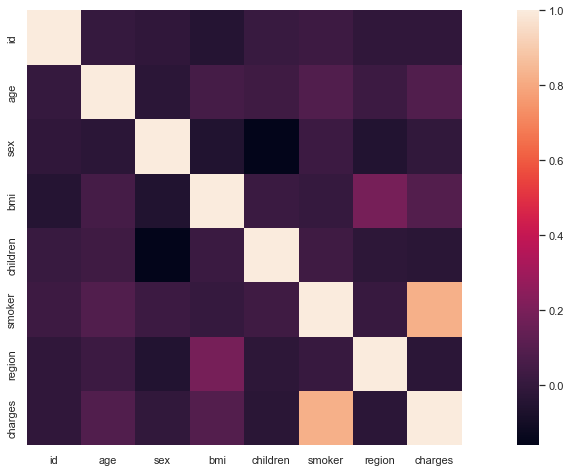

In [13]:
#変数間の相関係数をヒートマップで視覚化
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(train.corr(), annot=False, square=True,)

C:\Users\taka5\AppData\Local\Temp/ipykernel_12560/1545059671.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


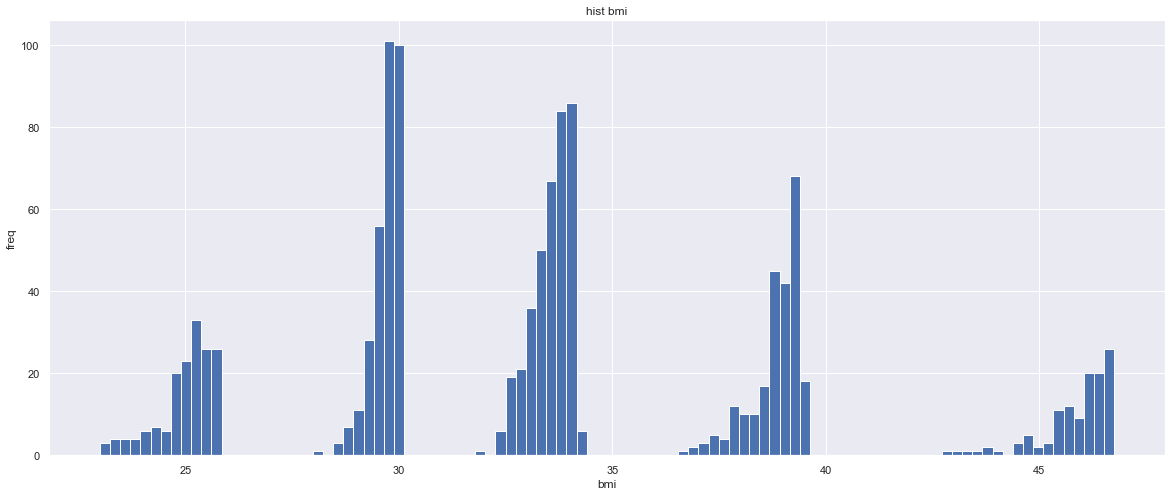

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([train["bmi"]], bins=100)
ax.set_title('hist bmi')
ax.set_xlabel('bmi')
ax.set_ylabel('freq')
fig.show()

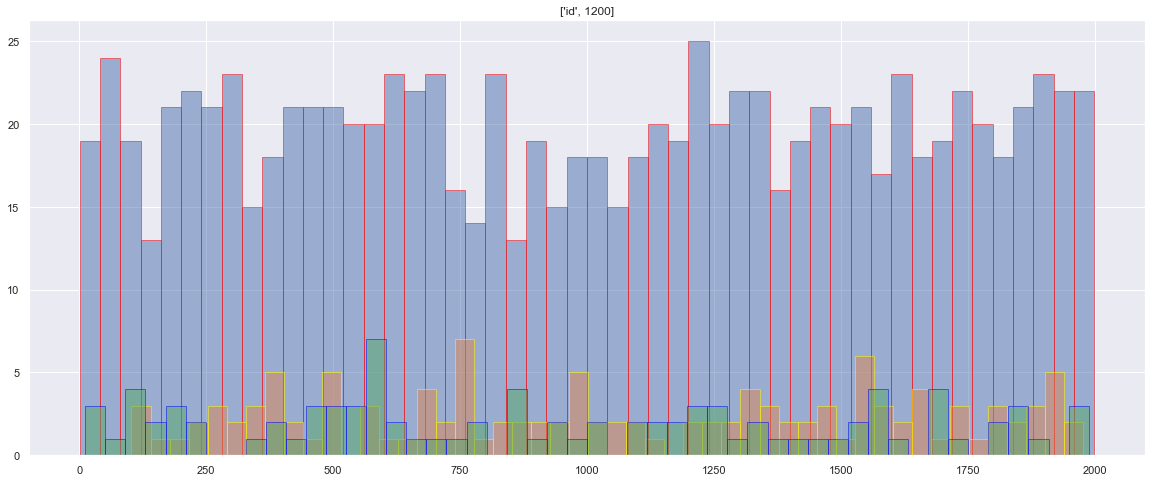

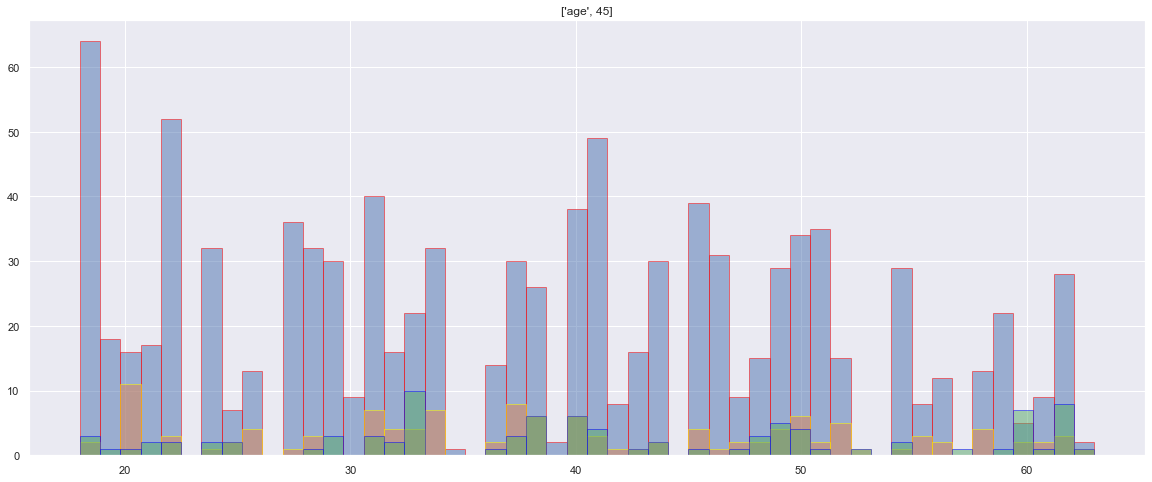

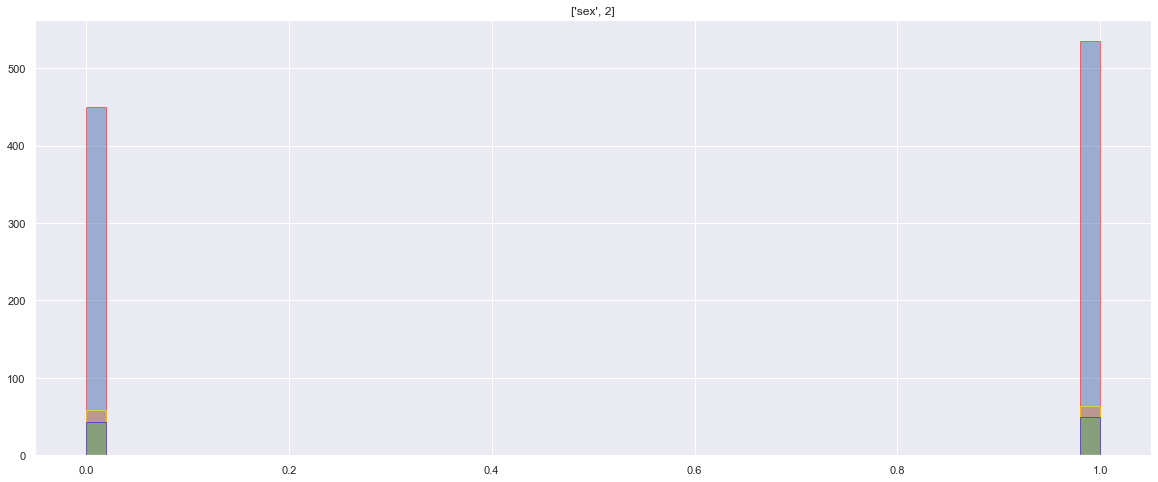

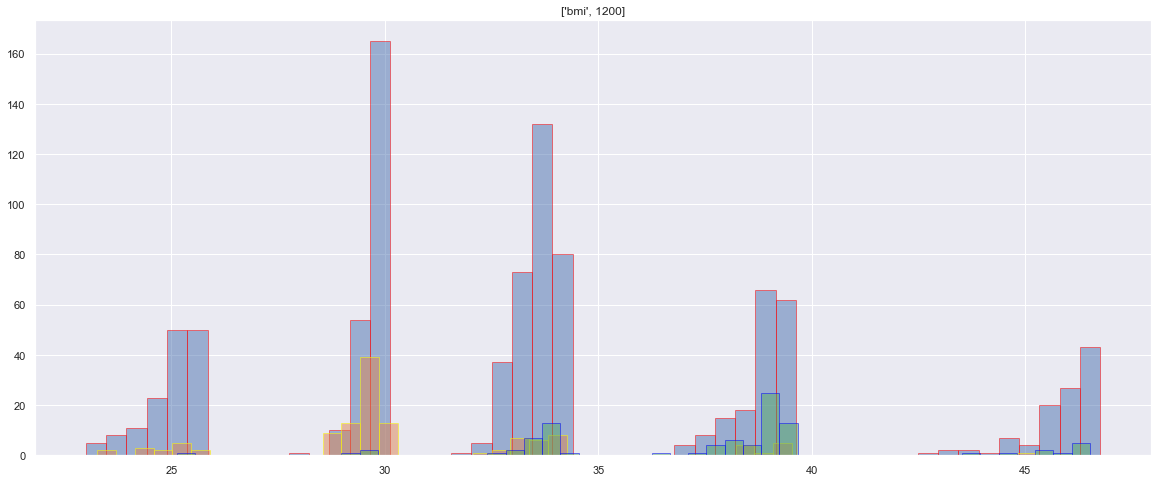

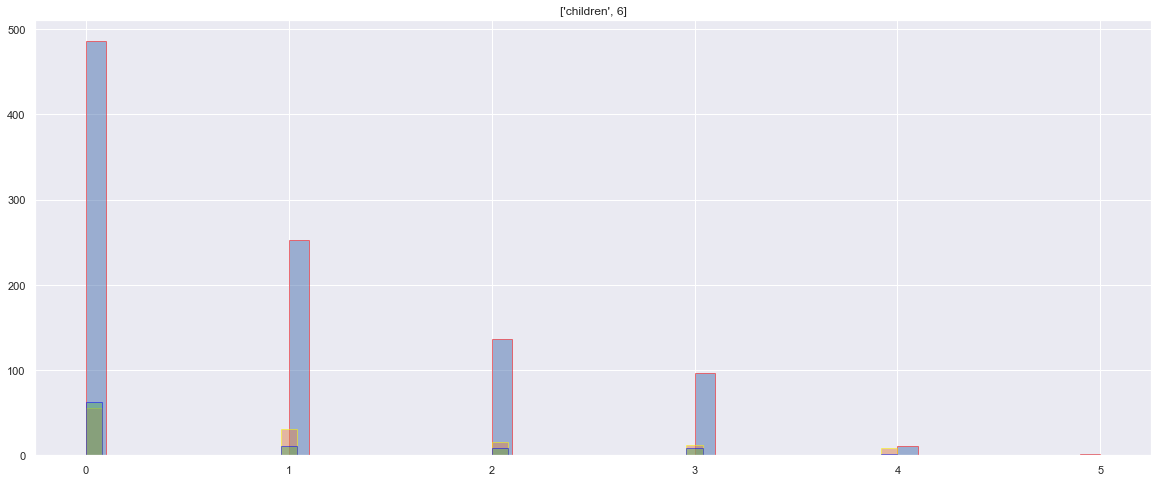

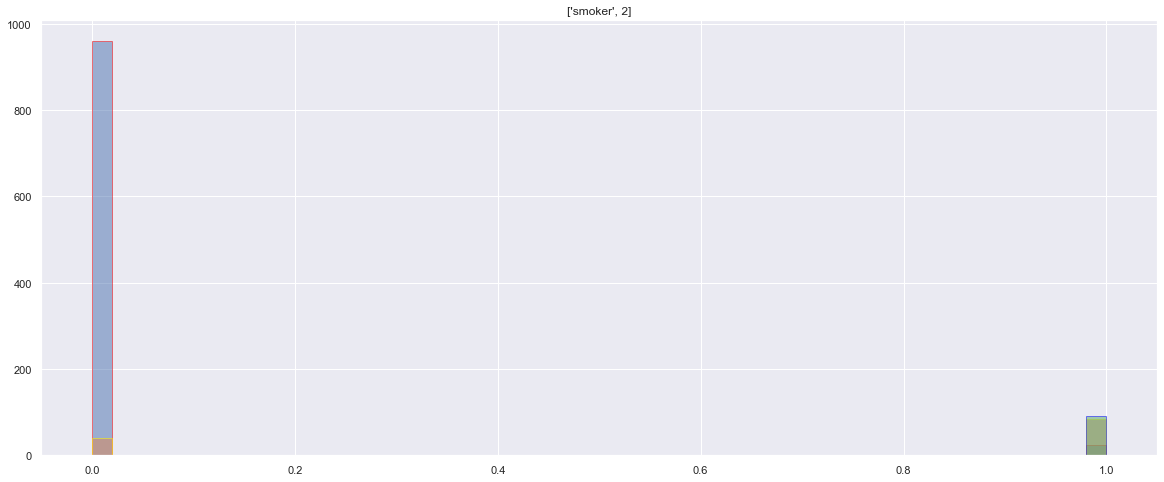

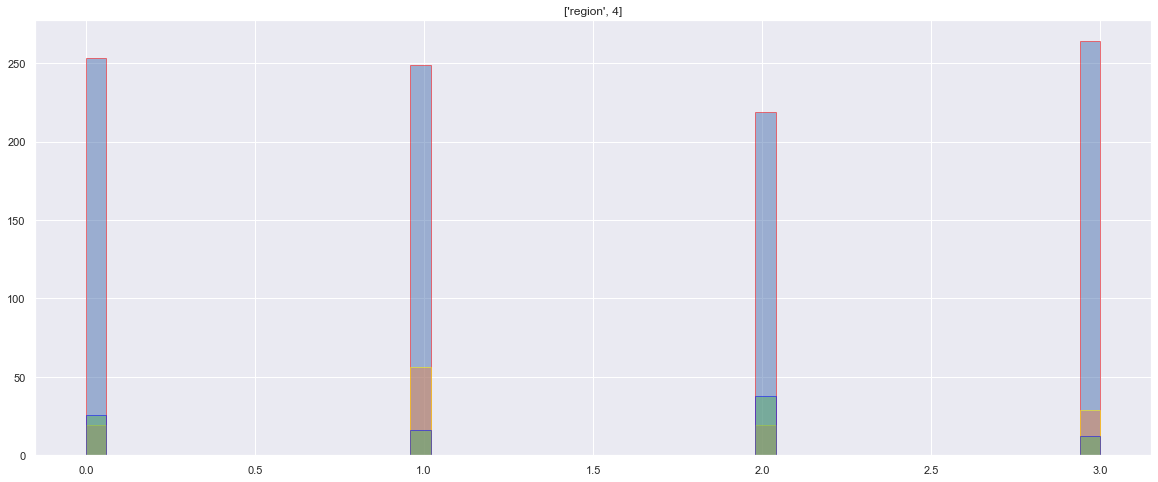

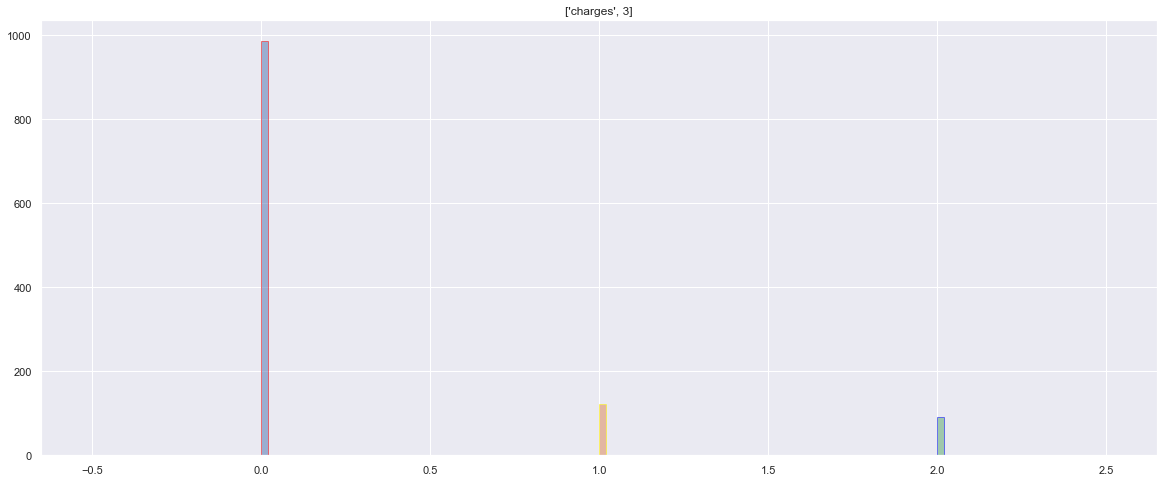

In [16]:
for i in train.columns:
    # carges列をndarrayに変換
    data_0 = np.array(train[i][train["charges"] == 0])
    data_1 = np.array(train[i][train["charges"] == 1])
    data_2 = np.array(train[i][train["charges"] == 2])

    # ヒストグラム
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.hist(data_0, bins=50, histtype='barstacked', ec="red", alpha = 0.5)
    ax.hist(data_1, bins=50, histtype='barstacked', ec="yellow", alpha = 0.5)
    ax.hist(data_2, bins=50, histtype='barstacked', ec="blue", alpha = 0.5)
    
    plt.title([i,len(train[i].unique())])
    plt.show()

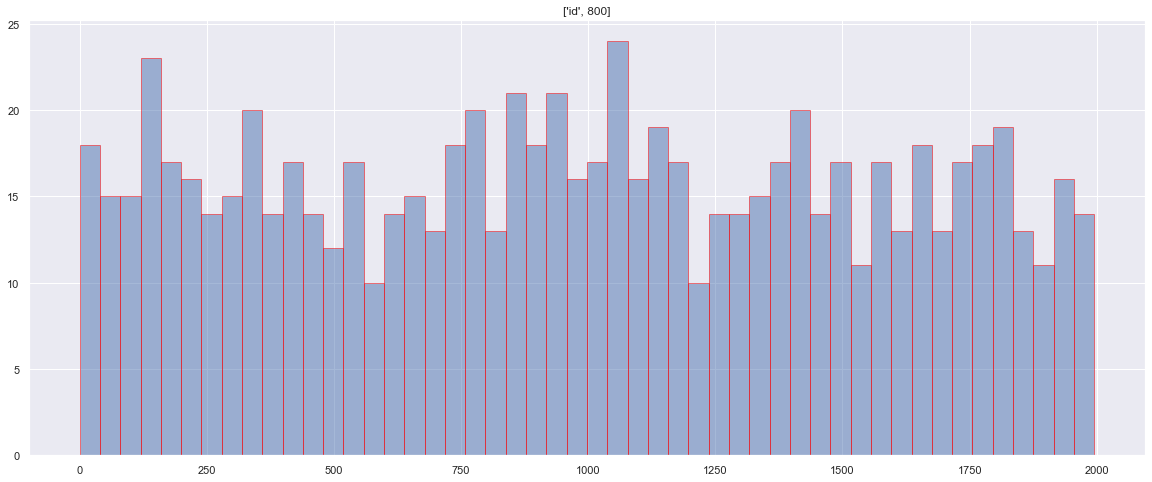

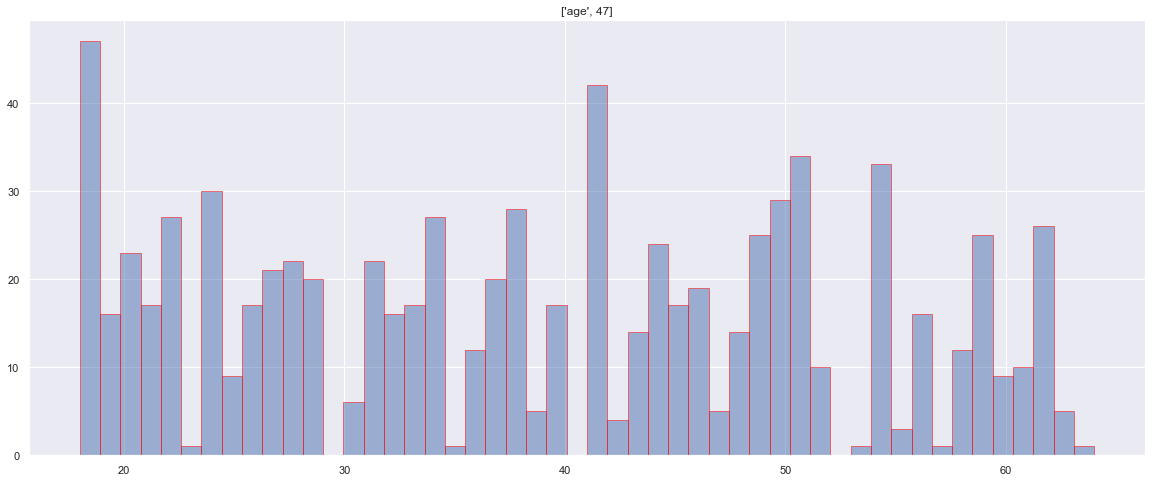

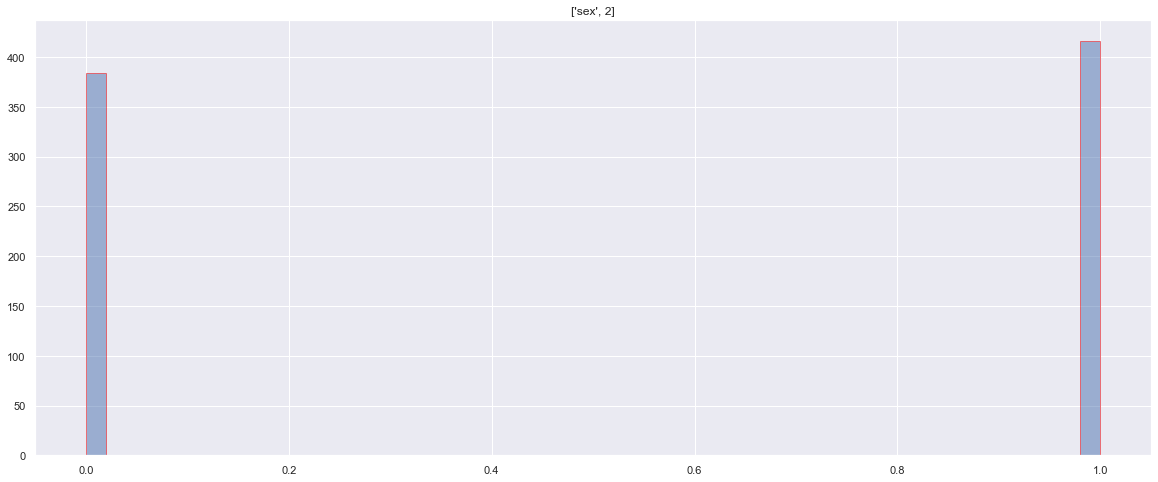

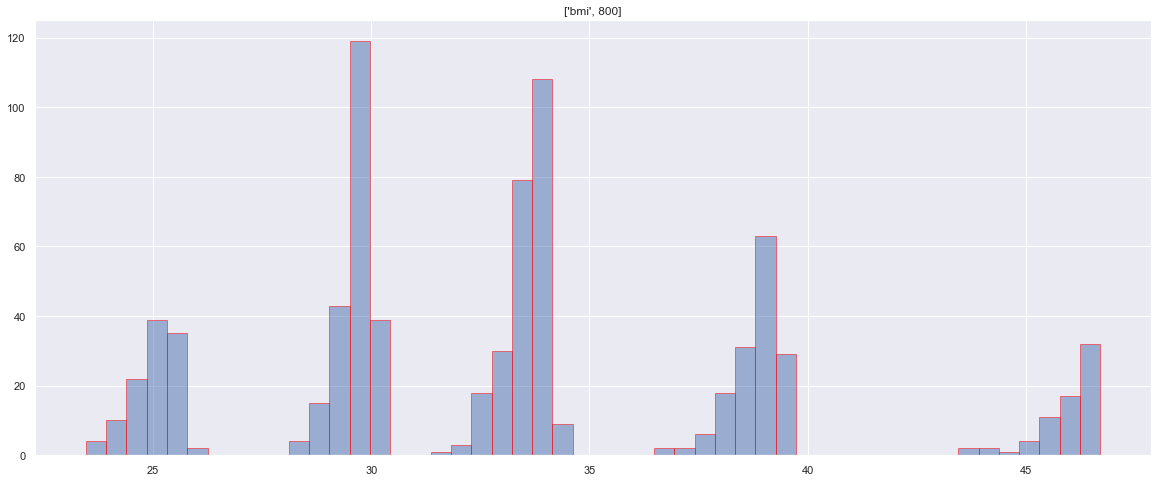

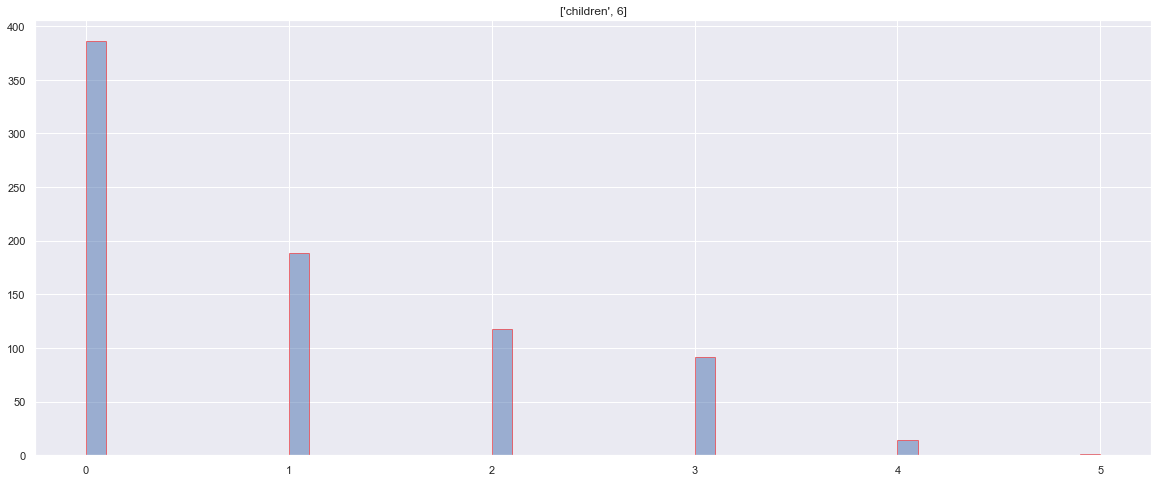

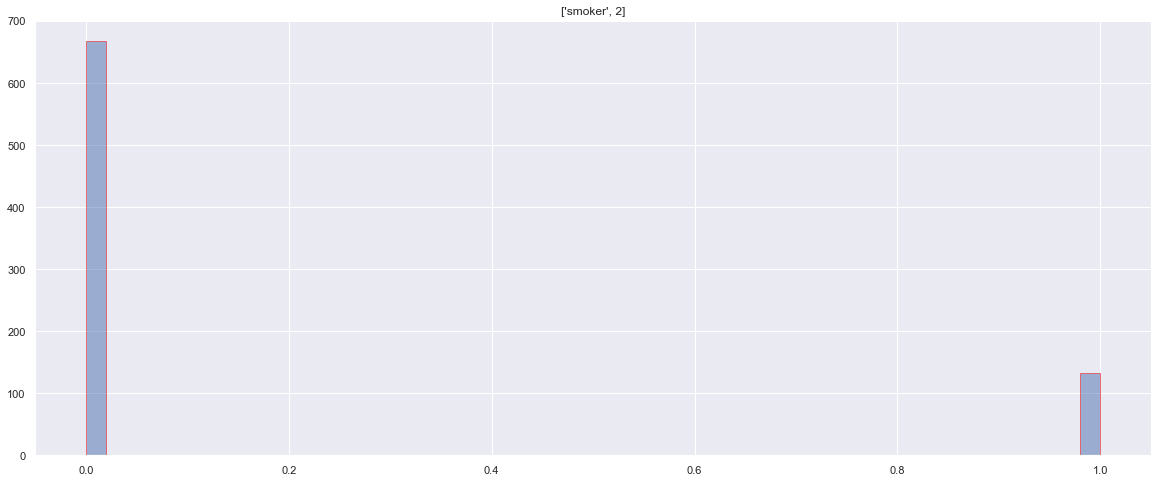

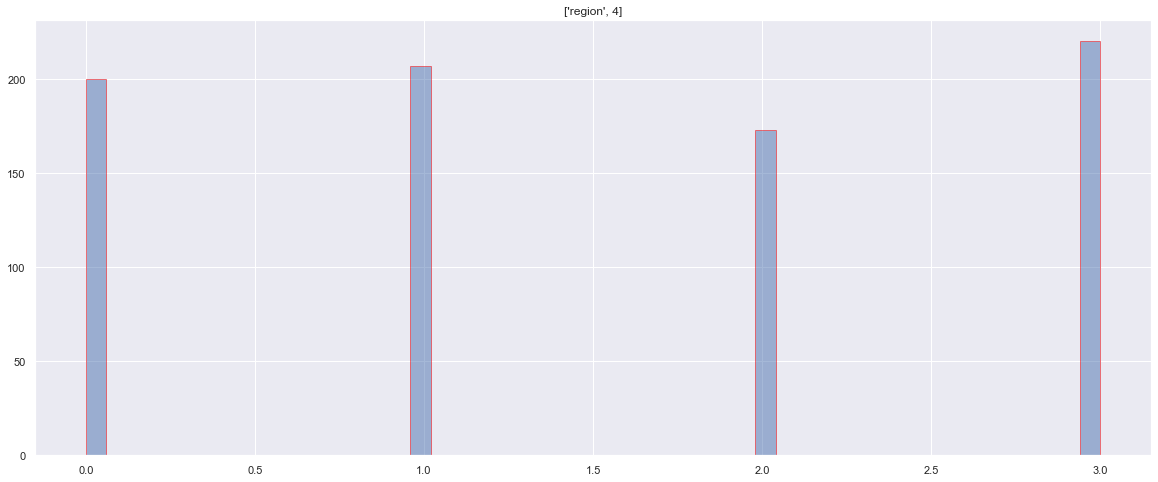

KeyError: 'charges'

In [18]:
for i in train.columns:
    # carges列をndarrayに変換
    data_0 = np.array(test[i])


    # ヒストグラム
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.hist(data_0, bins=50, histtype='barstacked', ec="red", alpha = 0.5)

    
    plt.title([i,len(test[i].unique())])
    plt.show()

In [ ]:
#教師データ、テストデータ設定
X = train.drop(['id', 'charges'], axis=1)
y = train['charges']

test = test.drop(['id'], axis=1)

In [ ]:
# feature importanceで重要度の確認
# ランダムフォレスト回帰木セット
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR(n_estimators=80, max_features='auto')
rf.fit(X, y)
 
f, ax = plt.subplots(figsize=(11, 15))
sns.barplot(x=rf.feature_importances_, y=X.columns.values, orient='h')

In [ ]:
#影響度の順番に並び替え 
org_sort = np.argsort(-rf.feature_importances_)
 
#f, ax = plt.subplots(figsize=(11, 19))
#sns.barplot(rf.feature_importances_[org_sort], y=X_train.columns.values[org_sort], orient='h')
 
X = X.iloc[:,org_sort[:3]]
test = test.iloc[:,org_sort[:3]]
 
X.head()

In [ ]:
test.head()